In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();


In [1]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Lets have some of the categories of fetch_20newsgroups

In [74]:
categories = ['soc.religion.christian', 'alt.atheism', 
              'rec.motorcycles', 'sci.space', 'misc.forsale']
#fetch_20newsgroups?
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


Here the data in train and test is shuffled. Lets peek into data

In [76]:
print(train.data[100], "Target:", train.target_names[train.target[100]])

From: wbg@festival.ed.ac.uk (W Geake)
Subject: EC BHP limit vetoed
Lines: 12

According to BBC Radio this morning, UK, Denmark, Portugal & a few
others have vetoed a proposal to limit EC-sold bikes to 100 BHP.  The
reason is that such a limit is not supported by accident statistics - a
rare example of governmental wisdom.  The limit has a five year
moratorium on it, and "specialist" manufacturers will be exempt anyway. 
Any suspicion that this is a crafty trick to restrict that end of the
market in Europe to Triumph, Norton (who? :-)), BMW, Cagiva & Ducati is
the sort of dangerous rubbish which stalls GATT talks.

You heard it here first.

Bill @ Univ Edinburgh, replete with 12 hp and a healthy blue exhaust.
 Target: rec.motorcycles


We see here that data are talking about motorcycles, and target is 2, which index into categories. "rec.motorcycles"

Lets make the pipeline, since we first want to convert 
our data to numerical features so that Multinomial Naive Bayes could work 
on that.
make_pipeline() takes objects of scikit-learn in-order.

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [43]:
model.fit(train.data, train.target)
labels_pred = model.predict(test.data)

One way to evaluate our model is to use confusion_matrix.
This will tell us, which class were predicted better than others,
and Which classes have similiar feature signature so our model finds
hard time to differentiate. 

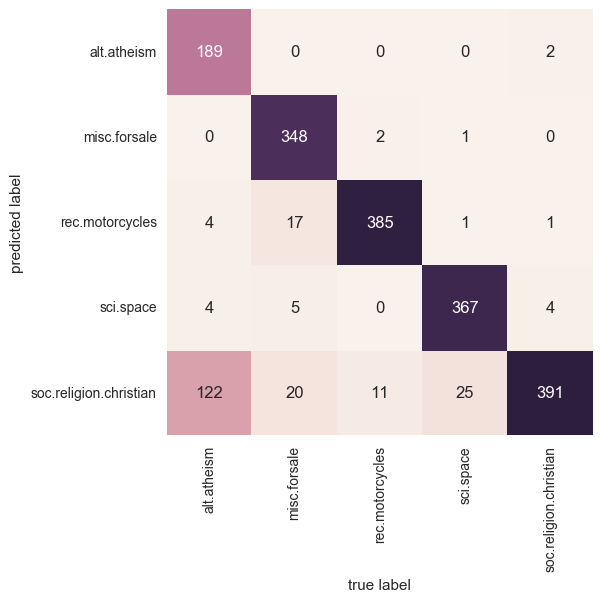

In [46]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(test.target, labels_pred)
sns.heatmap(confusion_mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');


from above confusion_mat we observe that
1. topics "alt.atheism" and "soc.religion.christian" are related, and   ofcourse these are mixed topics.
2. topic "misc.sale" and "rec.motorcycle" also some what related.

I good thing about MultinomialNB is that it simple classifier but has classifed very well acorss other categories.
Lets see the accuracy_score of the model.

In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_pred, test.target))

0.88467614534


88% is good for a simple classifier that work on "High Dimensional" data too. Hence MultinomialNB is often used as baseline classifier.

Now lets predict the label by model.


In [81]:
def predict_label(text, model=model, test=test):
    #print(model.predict([text]))
    label = test.target_names[model.predict([text])[0]]
    #prob = model.predict_proba(text)
    print( "Text: {} \n\nPredicted Label: {}" .\
            format(text, label))

In [82]:
predict_label("My motorbike is 13 BHP and runs faster than any other bike")

Text: My motorbike is 13 BHP and runs faster than any other bike 

Predicted Label: rec.motorcycles


In [85]:
predict_label("determining the screen resolution")

Text: determining the screen resolution 

Predicted Label: misc.forsale
